In [1]:
!pip install qiskit

  Created wheel for qiskit: filename=qiskit-0.32.0-py3-none-any.whl size=11756 sha256=9fcb7f371c213f532bb33c0ca26c9e846af5ed7911c5fdd4d432f27db332f061
  Stored in directory: c:\users\edenl\appdata\local\pip\cache\wheels\e6\95\f5\163a46b5a43b9a64e629935771ac007802e74f7fa35b9b44c5
  Created wheel for dlx: filename=dlx-1.0.4-py3-none-any.whl size=5709 sha256=3d635266880c13c493a5d35e1e6718ccedf5ad95f13b4dea2d2f25a22351808a
  Stored in directory: c:\users\edenl\appdata\local\pip\cache\wheels\c4\03\f9\7afbf40e0c3d6928d16bcadb46264a6e68704998ec72f7ea13
  Created wheel for docplex: filename=docplex-2.22.213-py3-none-any.whl size=696852 sha256=424b6434af4f53c149b787811a4342d29bb60c21710c544eb84b37c123318915
  Stored in directory: c:\users\edenl\appdata\local\pip\cache\wheels\35\3e\11\e31bf877e1965b75dc2f3de4ec2d5c9d1680c6f803ef76ed9f
  Created wheel for fastdtw: filename=fastdtw-0.3.4-py3-none-any.whl size=3588 sha256=83204fc304b11c865ed83759bcffa5adae75423da90ef82a8bcdc785494d8e56
  Stored in 

In [7]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [12]:
c = QuantumCircuit(2, 2)

In [13]:
c.draw()

q_0: 
     
q_1: 
     
c: 2/

In [24]:
c.h(0)

In [25]:
def get_counts(circuit, simulator, shots):
    from qiskit import transpile
    # compile the circuit down to low-level QASM instructions
    # supported by the backend (not needed for simple circuits)
    compiled_circuit = transpile(circuit, simulator)

    # Execute the circuit on the qasm simulator
    job = simulator.run(compiled_circuit, shots=shots)

    # Grab results from the job
    result = job.result()

    # Returns counts
    counts = result.get_counts(compiled_circuit)
    return counts

In [29]:
# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0], [0])

counts = get_counts(circuit, simulator, 100)

# Draw the circuit
circuit.draw()

┌───┐     ┌─┐
q_0: ┤ H ├──■──┤M├
     └───┘┌─┴─┐└╥┘
q_1: ─────┤ X ├─╫─
          └───┘ ║ 
c: 2/═══════════╩═
                0

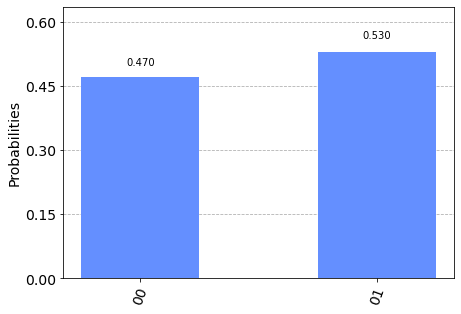

In [27]:
plot_histogram(counts)

{'01': 53, '00': 47}